## CardioVascular Disease Predication

In [166]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from kmodes.kmodes import KModes

In [239]:
df=pd.read_csv("cardio_train.csv",delimiter=';')
df.drop(columns='id', inplace=True)

In [168]:
df.head()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,22469,1,155,69.0,130,80,2,2,0,0,1,0
1,14648,1,163,71.0,110,70,1,1,0,0,1,1
2,21901,1,165,70.0,120,80,1,1,0,0,1,0
3,14549,2,165,85.0,120,80,1,1,1,1,1,0
4,23393,1,155,62.0,120,80,1,1,0,0,1,0


In [241]:
df["age"] = df["age"]/365
df.shape

(69301, 12)

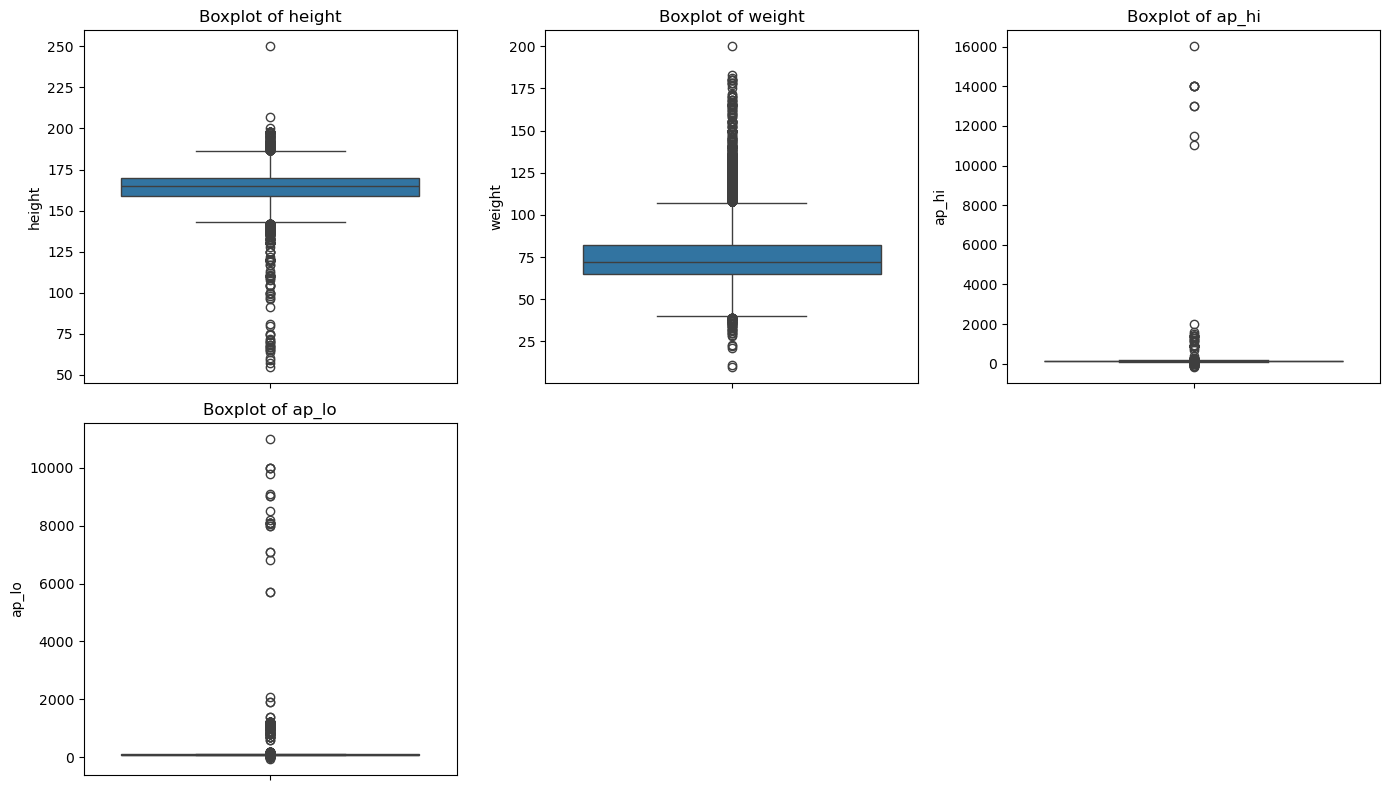

In [243]:
numeric_cols = ['height', 'weight', 'ap_hi', 'ap_lo']

plt.figure(figsize=(14, 8))

# Create a boxplot for each numeric column
for i, col in enumerate(numeric_cols, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(y=df[col])
    plt.title(f'Boxplot of {col}')

plt.tight_layout()
plt.show()

In [171]:
df.isna().sum()

age            0
gender         0
height         0
weight         0
ap_hi          0
ap_lo          0
cholesterol    0
gluc           0
smoke          0
alco           0
active         0
cardio         0
dtype: int64

In [245]:
numeric_cols = ['height', 'weight', 'ap_hi', 'ap_lo']

# Remove outliers outside the 2.5% to 97.5% quantiles
for col in numeric_cols:
    lower = df[col].quantile(0.025)
    upper = df[col].quantile(0.975)
    df[col] = df[col].clip(lower=lower, upper=upper)
    
df.shape

(69301, 12)

### Feature Reducion

##### Convering Age into bins

In [247]:

bins = [29, 35, 40, 45, 50, 55, 60, 65]  # Upper bound is exclusive
# labels = ["30-35", "35-40", "40-45", "45-50", "50-55", "55-60", "60-65"]
labels= [0, 1, 2, 3, 4, 5, 6]
df["Age_class"] = pd.cut(df["age"], bins=bins, labels=labels, right=False)


##### Calculating BMI and creating bins of BMI

In [249]:
df["height"] = df["height"] / 100  # Convert height from cm to meters
df["BMI"] = df["weight"] / (df["height"] ** 2) 

In [178]:
df.describe()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,BMI
count,69301.000000,69301.000000,69301.000000,69301.000000,69301.000000,69301.000000,69301.000000,69301.000000,69301.000000,69301.000000,69301.000000,69301.000000,69301.000000
mean,53.339140,1.349519,1.644116,74.020223,126.893739,81.445809,1.366806,1.226447,0.088051,0.053881,0.803986,0.499589,27.416998
std,6.759621,0.476821,0.074618,13.305190,16.012563,9.215335,0.680270,0.572246,0.283371,0.225784,0.396982,0.500003,4.870109
min,29.583562,1.000000,1.500000,51.000000,100.000000,60.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,15.740741
25%,48.394521,1.000000,1.590000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,23.875115
50%,53.983562,1.000000,1.650000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,26.397977
75%,58.427397,2.000000,1.700000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000,30.120482
max,64.967123,2.000000,1.800000,108.000000,170.000000,100.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000,48.000000


In [251]:
bins = [15, 20, 25, 30, 35, 40, 45, 50]  # Upper bound is exclusive
# # labels = ["15-20", "20-25", "25-30", "30-35", "35-40", "40-45", "45-50","50-55"]
labels=[0, 1, 2, 3, 4, 5, 6]

df["BMI_class"] = pd.cut(df["BMI"], bins=bins, labels=labels, right=False)
df = df.drop(columns=["BMI"])


In [180]:
df.isna().sum()

age            0
gender         0
height         0
weight         0
ap_hi          0
ap_lo          0
cholesterol    0
gluc           0
smoke          0
alco           0
active         0
cardio         0
Age_class      0
BMI_class      0
dtype: int64

In [253]:
df["map"] = (2*df["ap_lo"] + df["ap_hi"])/3

In [255]:
df["map"].describe()

count    69301.000000
mean        96.595119
std         10.651481
min         73.333333
25%         93.333333
50%         93.333333
75%        103.333333
max        123.333333
Name: map, dtype: float64

In [257]:
bins = [70, 80, 90, 100,110,124]  # Upper bound is exclusive
# labels = ["70-80", "80-90", "90-100", "100-110","110-120"]
labels=[0, 1, 2, 3, 4]

df["MAP_class"] = pd.cut(df["map"], bins=bins, labels=labels, right=False)
df = df.drop(columns=["map"])

In [184]:
df.head()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,Age_class,BMI_class,MAP_class
0,61.558904,1,1.55,69.0,130,80,2,2,0,0,1,0,6,2,2
1,40.131507,1,1.63,71.0,110,70,1,1,0,0,1,1,2,2,1
2,60.002740,1,1.65,70.0,120,80,1,1,0,0,1,0,6,2,2
3,39.860274,2,1.65,85.0,120,80,1,1,1,1,1,0,1,3,2
4,64.090411,1,1.55,62.0,120,80,1,1,0,0,1,0,6,2,2


In [259]:
df.isna().sum()

age            0
gender         0
height         0
weight         0
ap_hi          0
ap_lo          0
cholesterol    0
gluc           0
smoke          0
alco           0
active         0
cardio         0
Age_class      0
BMI_class      0
MAP_class      0
dtype: int64

In [261]:
df = df.drop(columns=["age"])
df = df.drop(columns=["ap_lo"])
df = df.drop(columns=["ap_hi"])
df = df.drop(columns=["height"])
df = df.drop(columns=["weight"])

In [263]:
df['Age_class'] = df['Age_class'].astype(int)
df['BMI_class'] = df['BMI_class'].astype(int)
df['MAP_class'] = df['MAP_class'].astype(int)

In [265]:
df.head()

,gender,cholesterol,gluc,smoke,alco,active,cardio,Age_class,BMI_class,MAP_class
0,1,2,2,0,0,1,0,6,2,2
1,1,1,1,0,0,1,1,2,2,1
2,1,1,1,0,0,1,0,6,2,2
3,2,1,1,1,1,1,0,1,3,2
4,1,1,1,0,0,1,0,6,2,2


### Clustering

In [267]:

categorical_columns = ['gender', 'cholesterol', 'gluc', 'smoke', 'alco', 'active', 
                       'cardio', 'Age_class', 'BMI_class', 'MAP_class']

# Extract categorical data
cat_data = df[categorical_columns]

# Initialize K-Modes (choose number of clusters, e.g., 3)
km = KModes(n_clusters=2, init='Huang', n_init=5, verbose=1)

# Fit the model and get cluster labels
clusters = km.fit_predict(cat_data)

# Add cluster labels to your original DataFrame
df['cluster'] = clusters


Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 11494, cost: 201635.0
Run 1, iteration: 2/100, moves: 5862, cost: 201635.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 30303, cost: 198760.0
Run 2, iteration: 2/100, moves: 279, cost: 198760.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 3, iteration: 1/100, moves: 22752, cost: 198760.0
Run 3, iteration: 2/100, moves: 874, cost: 198760.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 4, iteration: 1/100, moves: 0, cost: 201635.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 5, iteration: 1/100, moves: 13635, cost: 204370.0
Best run was number 2


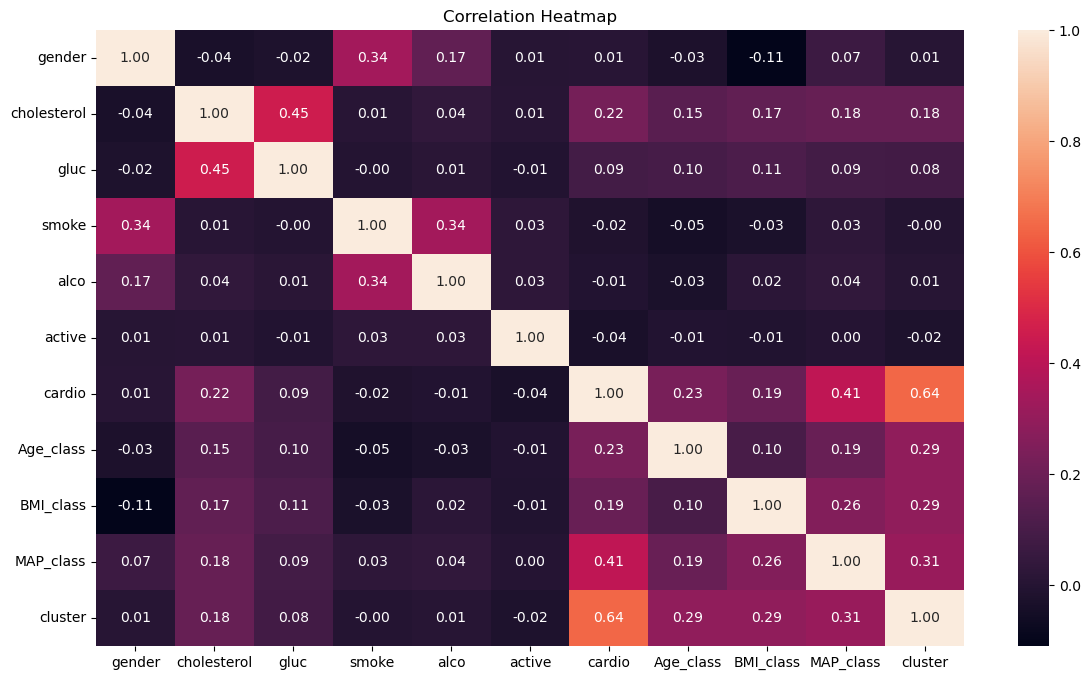

In [269]:
corr_matrix = df.corr()

plt.figure(figsize=(14, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()


In [271]:
df_male = df[df["gender"]==1]
df_female = df[df["gender"]==2]

In [273]:
df_male.shape[0] + df_female.shape[0]

69301

In [193]:
from sklearn.model_selection import train_test_split

#### Descision Tree

In [323]:
inputs = df_male.drop('cardio',axis='columns')
inputs.drop('gender', axis='columns', inplace=True)

target=df_male["cardio"]
X_train,X_test,Y_train,Y_test=train_test_split(inputs,target,test_size=0.2)

In [325]:
X_train.head()

,cholesterol,gluc,smoke,alco,active,Age_class,BMI_class,MAP_class,cluster
40820,1,1,0,0,1,4,2,1,0
15964,1,1,0,0,1,6,2,3,1
16977,1,1,0,0,1,3,1,1,0
10023,2,1,0,0,1,3,3,4,1
31615,1,1,0,0,1,4,1,1,0


In [333]:
from sklearn import tree
model=tree.DecisionTreeClassifier()

In [335]:
model.fit(X_train,Y_train)

DecisionTreeClassifier()

In [337]:
model.score(X_test,Y_test)

0.8792147293700089

### Score from cross validation

In [339]:
from sklearn.model_selection import KFold, cross_val_score
from sklearn.tree import DecisionTreeClassifier


model = DecisionTreeClassifier(random_state=42)
kf = KFold(n_splits=5, shuffle=True, random_state=42)

scores = cross_val_score(model, inputs,target , cv=kf, scoring='accuracy')


print("Cross-validation scores:", scores)
print("Mean accuracy:", scores.mean())



Cross-validation scores: [0.88098935 0.88121118 0.88087844 0.87566548 0.88008874]
Mean accuracy: 0.8797666390581409


### Random Forest

In [341]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()
rf.fit(X_train, Y_train)

RandomForestClassifier()

In [343]:
from sklearn.metrics import classification_report, accuracy_score
Y_pred = rf.predict(X_test)
print("Accuracy:", accuracy_score(Y_test, Y_pred))

Accuracy: 0.8807675244010648


In [345]:
model = RandomForestClassifier(random_state=42)
kf = KFold(n_splits=5, shuffle=True, random_state=42)

scores = cross_val_score(model, inputs,target , cv=kf, scoring='accuracy')


print("Cross-validation scores:", scores)
print("Mean accuracy:", scores.mean())

Cross-validation scores: [0.88265306 0.88187666 0.88265306 0.8757764  0.88031059]
Mean accuracy: 0.8806539554257643


### XG Boost

In [347]:
from xgboost import XGBClassifier
xg = XGBClassifier(use_label_encoder=False, eval_metric='logloss',enable_categorical=True, eta=0.01)
xg.fit(X_train, Y_train)

C:\Users\rajar\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [16:23:39] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=True, eta=0.01, eval_metric='logloss',
              feature_types=None, feature_weights=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None, ...)

In [349]:
Y_pred = xg.predict(X_test)

In [351]:
print("Accuracy:", accuracy_score(Y_test, Y_pred))
# print("\nClassification Report:\n", classification_report(Y_test, Y_pred))

Accuracy: 0.8818766637089619


In [353]:

model = XGBClassifier(random_state=42)

# Step 2: Define K-Fold (e.g., 5 splits)
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Step 3: Cross-validation scoring
scores = cross_val_score(model, inputs, target, cv=kf, scoring='accuracy')

# Step 4: Print results
print("Cross-validation scores:", scores)
print("Mean accuracy:", scores.mean())


Cross-validation scores: [0.88420586 0.88220941 0.88398403 0.87910382 0.8828619 ]
Mean accuracy: 0.882473000485733


### MLP

In [355]:
from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier(
    hidden_layer_sizes=(128, 64, 32),
    activation='relu',
    solver='adam',
    learning_rate_init=0.01,
    alpha=0.0001,
    early_stopping=True,
    validation_fraction=0.1,
    max_iter=500,
    random_state=42
)
mlp.fit(X_train, Y_train)

MLPClassifier(early_stopping=True, hidden_layer_sizes=(128, 64, 32),
              learning_rate_init=0.01, max_iter=500, random_state=42)

In [357]:
Y_pred = mlp.predict(X_test)

In [359]:
print("Accuracy:", accuracy_score(Y_test, Y_pred))

Accuracy: 0.8824312333629104


In [361]:
kf = KFold(n_splits=5, shuffle=True, random_state=42)

scores = cross_val_score(mlp, inputs, target, cv=kf, scoring='accuracy')

print("Cross-validation scores:", scores)
print("Mean accuracy:", scores.mean())

Cross-validation scores: [0.88276398 0.88409494 0.88642413 0.87954747 0.8875208 ]
Mean accuracy: 0.8840702644365278


#### MLP with GridSearchCV

In [212]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV

# Define the base model
mlp = MLPClassifier(
    early_stopping=True,
    validation_fraction=0.1,
    max_iter=500,
    random_state=42
)

# Define parameter grid
param_grid = {
    'hidden_layer_sizes': [(64,), (128,), (128, 64), (128, 64, 32)],
    'activation': ['relu', 'tanh'],
    'solver': ['adam'],
    'learning_rate_init': [0.001, 0.01],
    'alpha': [0.0001, 0.001],  # L2 regularization
}

# Setup GridSearchCV
grid = GridSearchCV(
    mlp,
    param_grid,
    scoring='accuracy',
    cv=5,
    n_jobs=-1,
    verbose=1
)

# Fit the model
grid.fit(X_train, Y_train)

# Print results
print("✅ Best Accuracy:", grid.best_score_)
print("🏆 Best Params:", grid.best_params_)


Fitting 5 folds for each of 32 candidates, totalling 160 fits


KeyboardInterrupt: 

### LGBM

In [379]:
import lightgbm as lgb

In [381]:
train_data = lgb.Dataset(X_train, label=Y_train, categorical_feature='auto')
test_data = lgb.Dataset(X_test, label=Y_test, categorical_feature='auto')


params = {
    'objective': 'binary',
    'metric': 'binary_logloss',
    'verbose': -1
}
num_round = 1000
bst = lgb.train(params, train_data, num_round, valid_sets=[
                test_data])

In [385]:
y_pred_probs = bst.predict(X_test)         # Probabilities
y_pred = (y_pred_probs > 0.5).astype(int)     # Convert to class labels

from sklearn.metrics import accuracy_score
acc = accuracy_score(Y_test, y_pred)
print(f"Accuracy: {acc:.4f}")

Accuracy: 0.8812


In [391]:
from lightgbm import LGBMClassifier
from sklearn.model_selection import KFold, cross_val_score

# Use the sklearn wrapper
model = LGBMClassifier(random_state=42)

kf = KFold(n_splits=5, shuffle=True, random_state=42)

scores = cross_val_score(model, inputs, target, cv=kf, scoring='accuracy')

print("Cross-validation scores:", scores)
print("Mean accuracy:", scores.mean())


Cross-validation scores: [0.8845386  0.88331854 0.88642413 0.87999113 0.88397116]
Mean accuracy: 0.8836487127586331


### After Hyper Parameter tunning

### CatBoost

In [393]:
from catboost import CatBoostClassifier

# Define categorical features (as indices)
cat_features = [X_train.columns.get_loc(col) for col in [
 'cholesterol', 'gluc', 'smoke', 'alco', 'active', 'Age_class', 'BMI_class', 'MAP_class'
]]

# Initialize CatBoostClassifier with default parameters
model = CatBoostClassifier(verbose=0, random_state=42)

# Train the model
model.fit(X_train, Y_train, cat_features=cat_features)


In [395]:
# Predict and evaluate
y_pred = model.predict(X_test)
acc = accuracy_score(Y_test, y_pred)
print(f"CatBoost Accuracy: {acc:.4f}")


CatBoost Accuracy: 0.8838


In [399]:
kf = KFold(n_splits=5, shuffle=True, random_state=42)

scores = cross_val_score(model, inputs, target, cv=kf, scoring='accuracy')

print("Cross-validation scores:", scores)
print("Mean accuracy:", scores.mean())

Cross-validation scores: [0.88498225 0.88287489 0.88464951 0.87932564 0.88618968]
Mean accuracy: 0.8836043963993758


#### IENN